## Classify the mushrooms into poisonous and non-poisonous class using the Decision Tree classifier. Use the dataset named “mushrooms.csv” and use the following classifier settings to evaluate the performance of classifier:
-	Use 80% of the data sample to train the classifier and rest of them to evaluate the classifier performance. 
-	Calculate the accuracy, sensitivity, specificity, true positive rate and false positive rate.

## 1. Importing dataset

In [1]:
import pandas as pd
complete_df = pd.read_csv('mushroom_csv.csv')

## 2. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [2]:
complete_df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


### Data Dictionary
- cap-shape
- cap-surface
- cap-color
- bruises%3F
- odor
- gill-attachment
- gill-spacing
- gill-size
- gill-color
- stalk-shape
- stalk-root
- stalk-surface-above-ring
- stalk-surface-below-ring
- stalk-color-above-ring
- stalk-color-below-ring
- veil-type
- veil-color
- ring-number
- ring-type
- spore-print-color
- population
- habitat
- class

In [3]:
complete_df.shape

(8124, 23)

In [4]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises%3F                  8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  5644 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [5]:
complete_df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [7]:
def bar_chart(feature):
    poisonus = complete_df[complete_df['class']=='p'][feature].value_counts()
    not_poisonus = complete_df[complete_df['class']=='e'][feature].value_counts()
    df = pd.DataFrame([poisonus,not_poisonus])
    df.index = ['poisonus','not_poisonus']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

## 3. Feature engineering

In [8]:
complete = [complete_df]

In [9]:
#cap-shape
complete_df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [10]:
cap_shape_mapping = {"x": 0, "f": 1, "k": 2, 
                 "b": 3, "s": 4, "c": 5 }
for dataset in complete:
    dataset['cap-shape'] = dataset['cap-shape'].map(cap_shape_mapping)

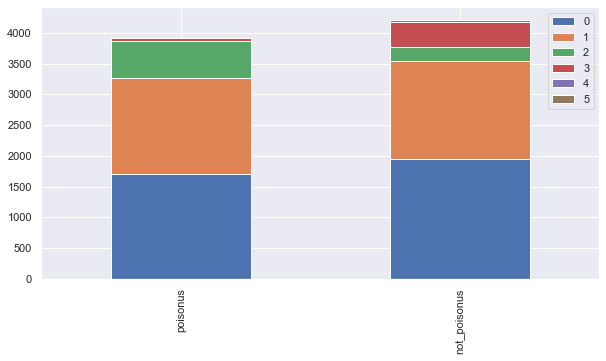

In [11]:
bar_chart('cap-shape')

In [12]:
complete_df['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [13]:
cap_surface_mapping = {"y": 0, "s": 1, "f": 2, 
                 "g": 3 }
for dataset in complete:
    dataset['cap-surface'] = dataset['cap-surface'].map(cap_surface_mapping)

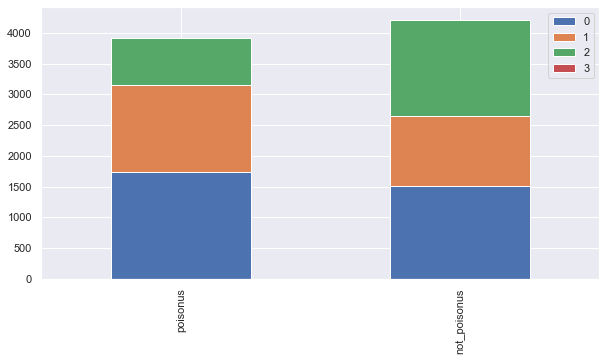

In [14]:
bar_chart('cap-surface')

In [15]:
complete_df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [16]:
cap_color_mapping = {"n": 0, "g": 1, "e": 2, 
                 "y": 3,"w": 4, "b": 5, "p": 6, 
                 "c": 7,"u": 8, "r": 9 }
for dataset in complete:
    dataset['cap-color'] = dataset['cap-color'].map(cap_color_mapping)

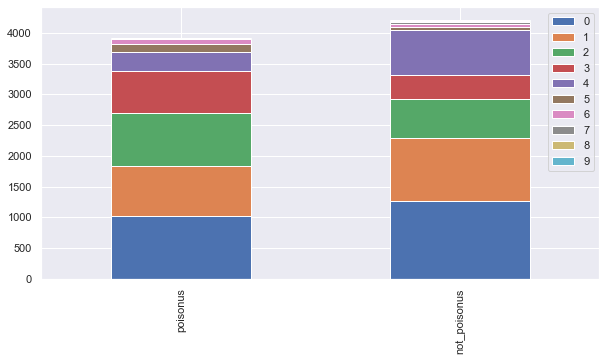

In [17]:
bar_chart('cap-color')

In [18]:
#bruises%3F
complete_df['bruises%3F'].value_counts()

f    4748
t    3376
Name: bruises%3F, dtype: int64

In [19]:
bruises_mapping = {"f": 0, "t": 1}
for dataset in complete:
    dataset['bruises%3F'] = dataset['bruises%3F'].map(bruises_mapping)

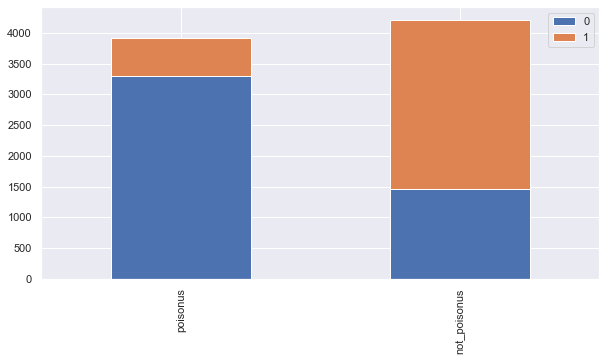

In [20]:
bar_chart('bruises%3F')

In [21]:
#odor
complete_df['odor'].value_counts()

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [22]:
odor_mapping = {"n": 0, "f": 1, "y": 2, 
                 "s": 3,"a": 4, "l": 5, "p": 6, 
                 "c": 7,"m": 8 }
for dataset in complete:
    dataset['odor'] = dataset['odor'].map(odor_mapping)

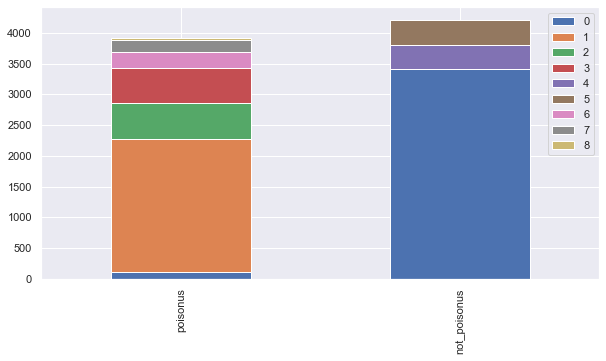

In [23]:
bar_chart('odor')

In [24]:
#gill-attachment
complete_df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

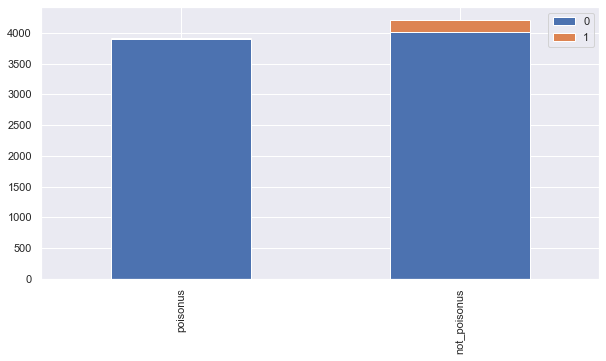

In [25]:
gill_attachment_mapping = {"f": 0, "a": 1}
for dataset in complete:
    dataset['gill-attachment'] = dataset['gill-attachment'].map(gill_attachment_mapping)
bar_chart('gill-attachment')

In [26]:
#gill-spacing
complete_df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

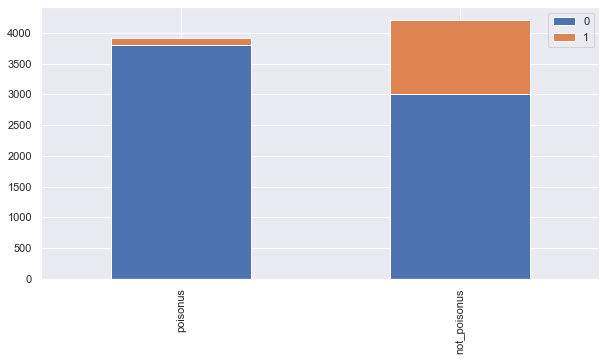

In [27]:
gill_spacing_mapping = {"c": 0, "w": 1}
for dataset in complete:
    dataset['gill-spacing'] = dataset['gill-spacing'].map(gill_spacing_mapping)
bar_chart('gill-spacing')

In [28]:
#gill-size
complete_df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

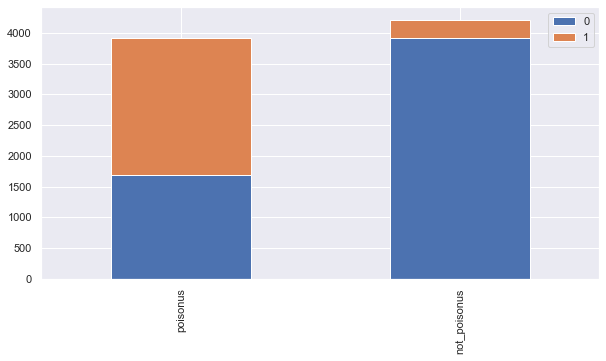

In [29]:
gill_size_mapping = {"b": 0, "n": 1}
for dataset in complete:
    dataset['gill-size'] = dataset['gill-size'].map(gill_size_mapping)
bar_chart('gill-size')

In [30]:
#gill-color
complete_df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

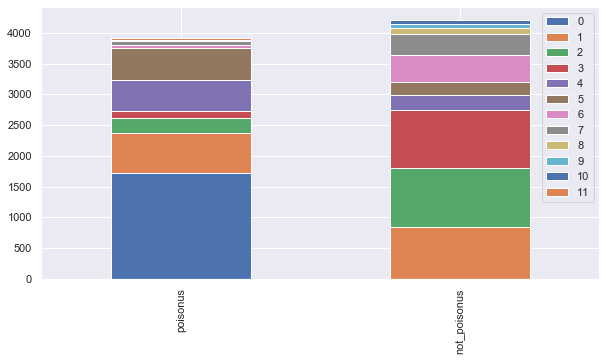

In [31]:
gill_color_mapping = {"b": 0, "p": 1, "w": 2, 
                 "n": 3,"g": 4, "h": 5, "u": 6, 
                 "k": 7,"e": 8,"y":9 , "o":10, "r":11}
for dataset in complete:
    dataset['gill-color'] = dataset['gill-color'].map(gill_color_mapping)
bar_chart('gill-color')

In [32]:
#stalk-shape
complete_df['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

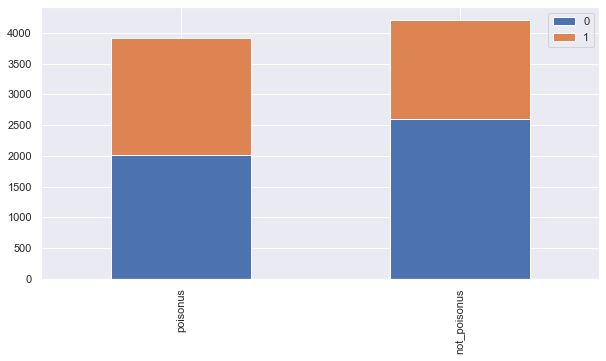

In [33]:
stalk_shape_mapping = {"t": 0, "e": 1}
for dataset in complete:
    dataset['stalk-shape'] = dataset['stalk-shape'].map(stalk_shape_mapping)
bar_chart('stalk-shape')

In [34]:
#stalk-root
complete_df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

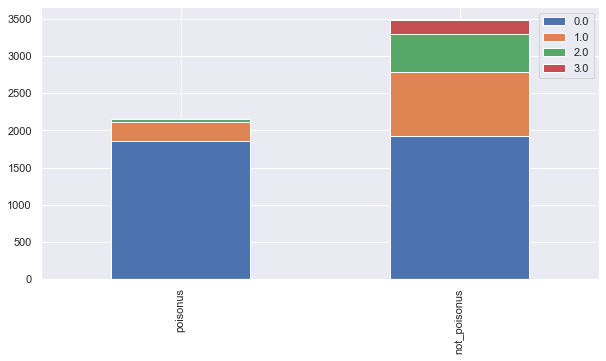

In [35]:
stalk_root_mapping = {"b": 0, "e": 1, "c": 2, "r": 3}
for dataset in complete:
    dataset['stalk-root'] = dataset['stalk-root'].map(stalk_root_mapping)
bar_chart('stalk-root')

In [36]:
complete_df["stalk-root"].fillna(complete_df.groupby("stalk-shape")["stalk-root"].transform("median"), inplace=True)
complete_df.groupby("stalk-shape")["stalk-root"].transform("median")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    0.0
8123    0.0
Name: stalk-root, Length: 8124, dtype: float64

In [37]:
complete_df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [38]:
#stalk-surface-above-ring
complete_df['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

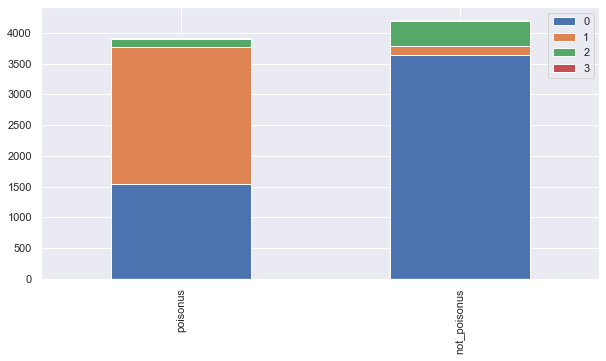

In [39]:
above_ring_mapping = {"s": 0, "k": 1, "f": 2, "y": 3}
for dataset in complete:
    dataset['stalk-surface-above-ring'] = dataset['stalk-surface-above-ring'].map(above_ring_mapping)
bar_chart('stalk-surface-above-ring')

In [40]:
#stalk-surface-below-ring
complete_df['stalk-surface-below-ring'].value_counts()

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

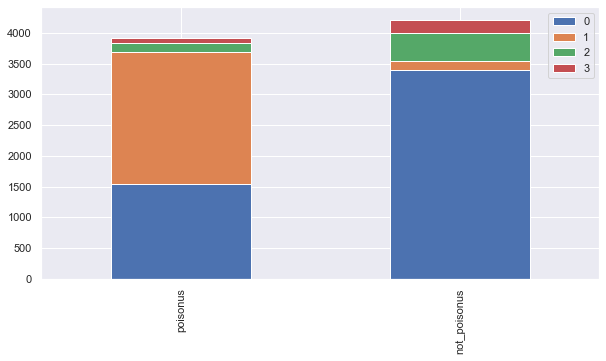

In [41]:
below_ring_mapping = {"s": 0, "k": 1, "f": 2, "y": 3}
for dataset in complete:
    dataset['stalk-surface-below-ring'] = dataset['stalk-surface-below-ring'].map(below_ring_mapping)
bar_chart('stalk-surface-below-ring')

In [42]:
#stalk-color-above-ring
complete_df['stalk-color-above-ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

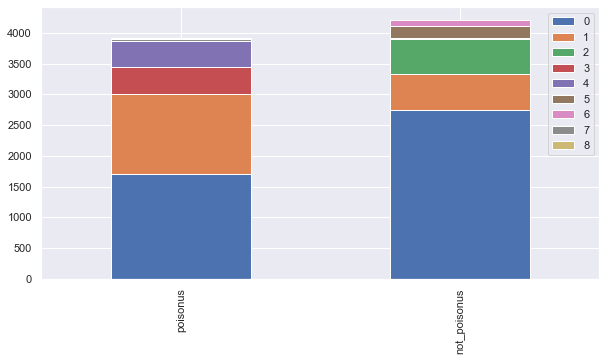

In [43]:
c_above_ring_mapping = {"w": 0, "p": 1, "g": 2, "n": 3, "b":4, "o":5 ,"e":6, "c":7, "y":8}
for dataset in complete:
    dataset['stalk-color-above-ring'] = dataset['stalk-color-above-ring'].map(c_above_ring_mapping)
bar_chart('stalk-color-above-ring')

In [44]:
#stalk-color-below-ring
complete_df['stalk-color-below-ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

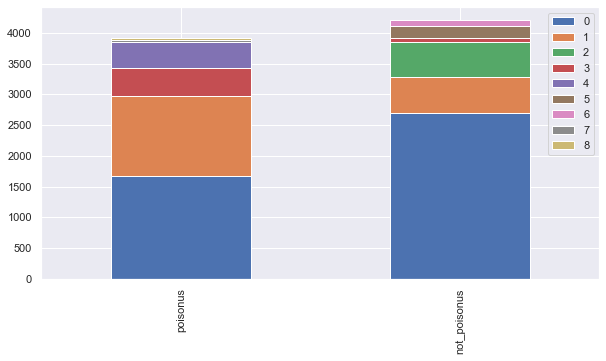

In [45]:
c_below_ring_mapping = {"w": 0, "p": 1, "g": 2, "n": 3, "b":4, "o":5 ,"e":6, "c":7, "y":8}
for dataset in complete:
    dataset['stalk-color-below-ring'] = dataset['stalk-color-below-ring'].map(c_below_ring_mapping)
bar_chart('stalk-color-below-ring')

In [46]:
#veil-type
complete_df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

As both types of mushrooms have save veil_type, this data field is useless and should be removed

In [47]:
complete_df.drop('veil-type', axis=1, inplace=True)

In [48]:
#veil-color
complete_df['veil-color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

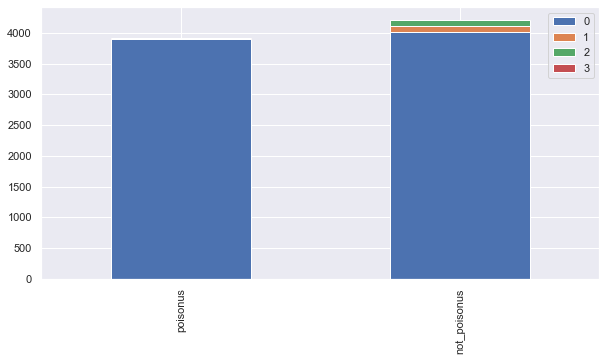

In [49]:
veil_color_mapping = {"w": 0, "n": 1, "o": 2, "y": 3}
for dataset in complete:
    dataset['veil-color'] = dataset['veil-color'].map(veil_color_mapping)
bar_chart('veil-color')

In [50]:
#ring-number
complete_df['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

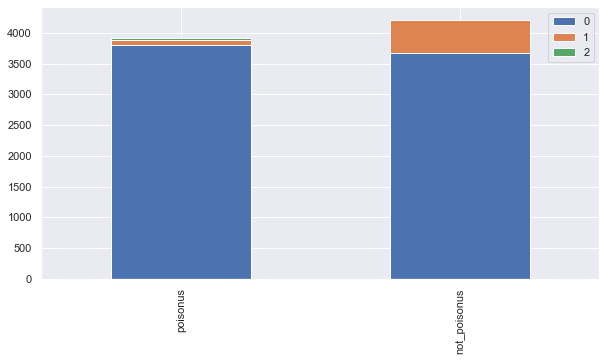

In [51]:
ring_number_mapping = {"o": 0, "t": 1, "n": 2}
for dataset in complete:
    dataset['ring-number'] = dataset['ring-number'].map(ring_number_mapping)
bar_chart('ring-number')

In [52]:
#ring-type
complete_df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

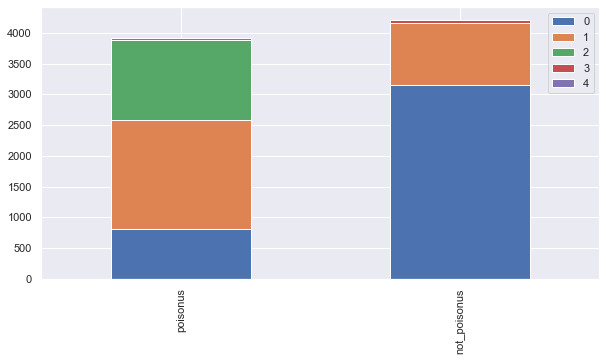

In [53]:
ring_type_mapping = {"p": 0, "e": 1, "l": 2, "f": 3, "n":4}
for dataset in complete:
    dataset['ring-type'] = dataset['ring-type'].map(ring_type_mapping)
bar_chart('ring-type')

In [54]:
#spore-print-color
complete_df['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
o      48
b      48
u      48
y      48
Name: spore-print-color, dtype: int64

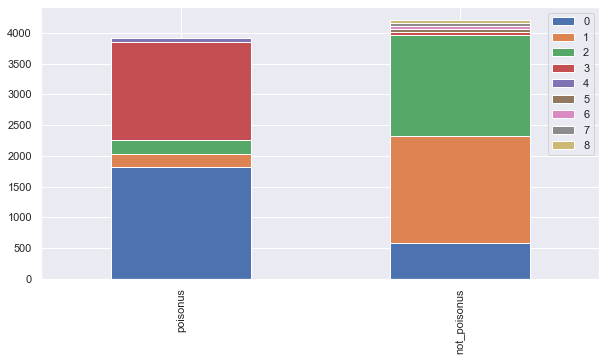

In [55]:
spore_print_color_mapping = {"w": 0, "n": 1, "k": 2, "h": 3, "r":4, "y":5 ,"u":6, "o":7, "b":8}
for dataset in complete:
    dataset['spore-print-color'] = dataset['spore-print-color'].map(spore_print_color_mapping)
bar_chart('spore-print-color')

In [56]:
#population
complete_df['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

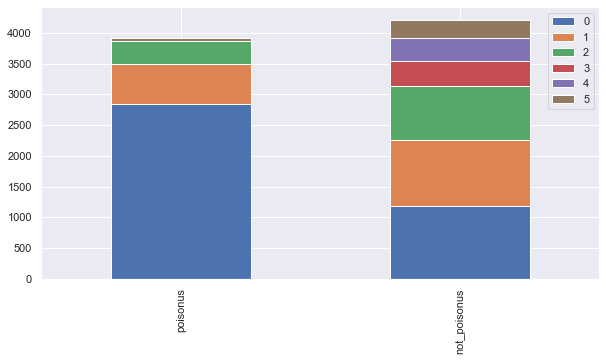

In [57]:
population_mapping = {"v": 0, "y": 1, "s": 2, "n": 3, "a":4, "c":5}
for dataset in complete:
    dataset['population'] = dataset['population'].map(population_mapping)
bar_chart('population')

In [58]:
#habitat
complete_df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

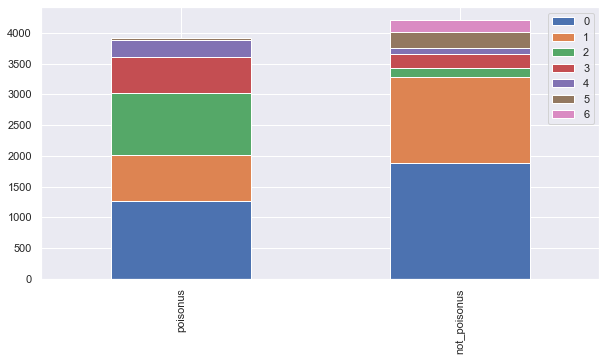

In [59]:
habitat_mapping = {"d": 0, "g": 1, "p": 2, "l": 3, "u":4, "m":5, "w":6}
for dataset in complete:
    dataset['habitat'] = dataset['habitat'].map(habitat_mapping)
bar_chart('habitat')

In [60]:
complete_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,1,0,1,6,0,0,1,7,1,...,0,0,0,0,0,0,2,2,4,p
1,0,1,3,1,4,0,0,0,7,1,...,0,0,0,0,0,0,1,3,1,e
2,3,1,4,1,5,0,0,0,3,1,...,0,0,0,0,0,0,1,3,5,e
3,0,0,4,1,6,0,0,1,3,1,...,0,0,0,0,0,0,2,2,4,p
4,0,1,1,0,0,0,1,0,7,0,...,0,0,0,0,0,1,1,4,1,e


In [61]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises%3F                  8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null float64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8124 non-null int64
spore-print-color          

In [62]:
train_data = complete_df.drop('class', axis=1)
target = complete_df['class']

train_data.shape, target.shape

((8124, 21), (8124,))

In [63]:
train_data.head(10)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,0,1,6,0,0,1,7,1,...,0,0,0,0,0,0,0,2,2,4
1,0,1,3,1,4,0,0,0,7,1,...,0,0,0,0,0,0,0,1,3,1
2,3,1,4,1,5,0,0,0,3,1,...,0,0,0,0,0,0,0,1,3,5
3,0,0,4,1,6,0,0,1,3,1,...,0,0,0,0,0,0,0,2,2,4
4,0,1,1,0,0,0,1,0,7,0,...,0,0,0,0,0,0,1,1,4,1
5,0,0,3,1,4,0,0,0,3,1,...,0,0,0,0,0,0,0,2,3,1
6,3,1,4,1,4,0,0,0,4,1,...,0,0,0,0,0,0,0,2,3,5
7,3,0,4,1,5,0,0,0,3,1,...,0,0,0,0,0,0,0,1,2,5
8,0,0,4,1,6,0,0,1,1,1,...,0,0,0,0,0,0,0,2,0,1
9,3,1,3,1,4,0,0,0,4,1,...,0,0,0,0,0,0,0,2,2,5


### 4. Modelling

In [64]:
import numpy as np

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises%3F                  8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null float64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8124 non-null int64
spore-print-color          

## 5. Decision Tree Classifier

In [66]:
from sklearn.model_selection import train_test_split
X = train_data # Features
y = target  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6. Training

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

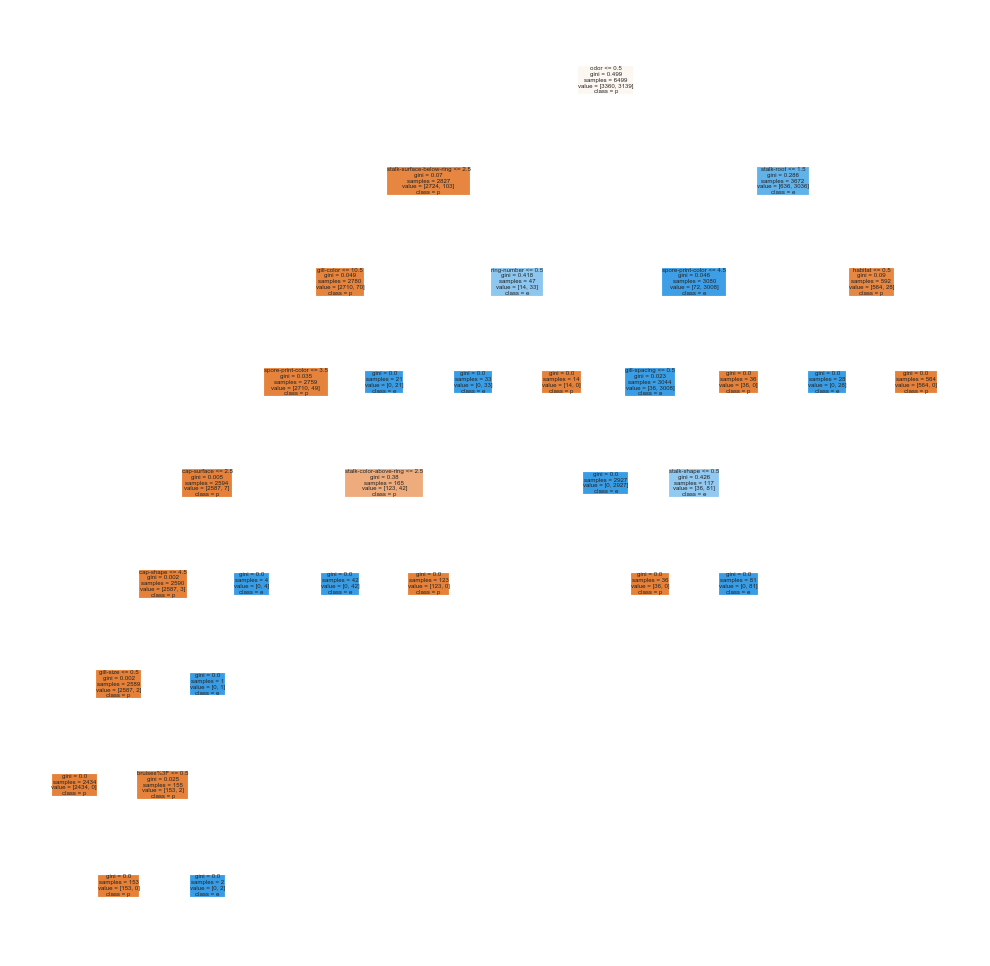

In [68]:
from sklearn import tree
fn= list(train_data.columns)
cn=['p', 'e']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('decisionTree.png')

# 7. Testing

### Visualizing Important Features

In [69]:
feature_imp = pd.Series(dt.feature_importances_,index = list(train_data.columns)).sort_values(ascending=False)
feature_imp

odor                        0.614824
stalk-root                  0.264254
spore-print-color           0.027471
stalk-color-above-ring      0.019292
habitat                     0.016437
stalk-shape                 0.015357
stalk-surface-below-ring    0.013051
gill-color                  0.012390
gill-spacing                0.006563
ring-number                 0.006057
cap-surface                 0.002455
bruises%3F                  0.001216
cap-shape                   0.000615
gill-size                   0.000015
veil-color                  0.000000
stalk-color-below-ring      0.000000
stalk-surface-above-ring    0.000000
population                  0.000000
gill-attachment             0.000000
ring-type                   0.000000
cap-color                   0.000000
dtype: float64

No handles with labels found to put in legend.


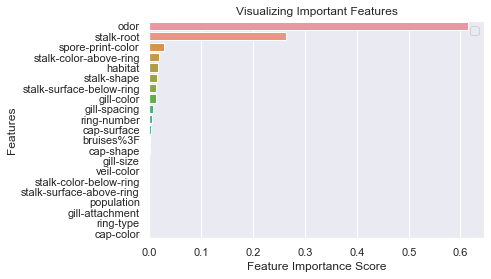

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [71]:
y_pred = dt.predict(X_test)

# 8. Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[848   0]
 [  0 777]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       848
           p       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

